In [21]:
import pandas as pd
import numpy as np
import math
import pandas_datareader as web
from statsmodels.tsa.statespace.sarimax import SARIMAX

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [22]:
df  = web.DataReader('BB', data_source = 'yahoo', start= '2014-01-01' ,end= '2020-12-17')

In [23]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-12-31,7.45,7.25,7.30,7.44,13113400,7.44
2014-01-02,7.77,7.33,7.45,7.65,25840900,7.65
2014-01-03,7.77,7.43,7.71,7.61,21647100,7.61
2014-01-06,8.03,7.61,7.61,8.01,37202800,8.01
2014-01-07,8.58,8.10,8.10,8.50,71568800,8.50


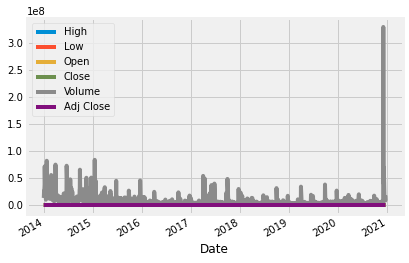

In [24]:
df.plot()

In [25]:
df = df['Close']

In [26]:
df.head()

Date
2013-12-31    7.44
2014-01-02    7.65
2014-01-03    7.61
2014-01-06    8.01
2014-01-07    8.50
Name: Close, dtype: float64

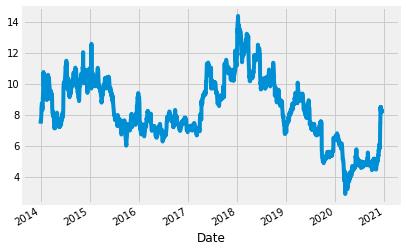

In [27]:
df.plot()

In [49]:
sarimax_model = SARIMAX(df,order=(1,1,1),seasonal_order=(1,1,1,12))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [50]:
res =sarimax_model.fit(disp=False)

In [51]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 1755
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -73.204
Date:                            Sat, 26 Jun 2021   AIC                            156.408
Time:                                    08:37:51   BIC                            183.722
Sample:                                         0   HQIC                           166.507
                                           - 1755                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1530      0.335     -0.457      0.648      -0.809       0.503
ma.L1          0.0854      0.338      0.253      0.800      -0.576       0.747
ar.S.L12       0.0351      0.024      1.449      0.147      -0.012       0.082
ma.S.L12      -0.9995      0.246     -4.070      0.000      -1.481      -0.518
sigma2         0.0616      0.015      4.125      0.000       0.032       0.091
===================================================================================
Ljung-Box (Q):                       31.83   Jarque-Bera (JB):             23038.17
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                             0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
predictions=res.predict(start='2019-10-15',end='2020-12-17',dynamic=True)
#df[['Close','forecast']].plot(figsize=(12,8))

In [53]:
predictions.head()

Date
2019-10-15    5.232193
2019-10-16    5.212686
2019-10-17    5.221888
2019-10-18    5.205279
2019-10-21    5.251043
dtype: float64

In [40]:
dr['predictions']=predictions

NameError: name 'dr' is not defined

In [54]:
df.head()

Date
2013-12-31    7.44
2014-01-02    7.65
2014-01-03    7.61
2014-01-06    8.01
2014-01-07    8.50
Name: Close, dtype: float64

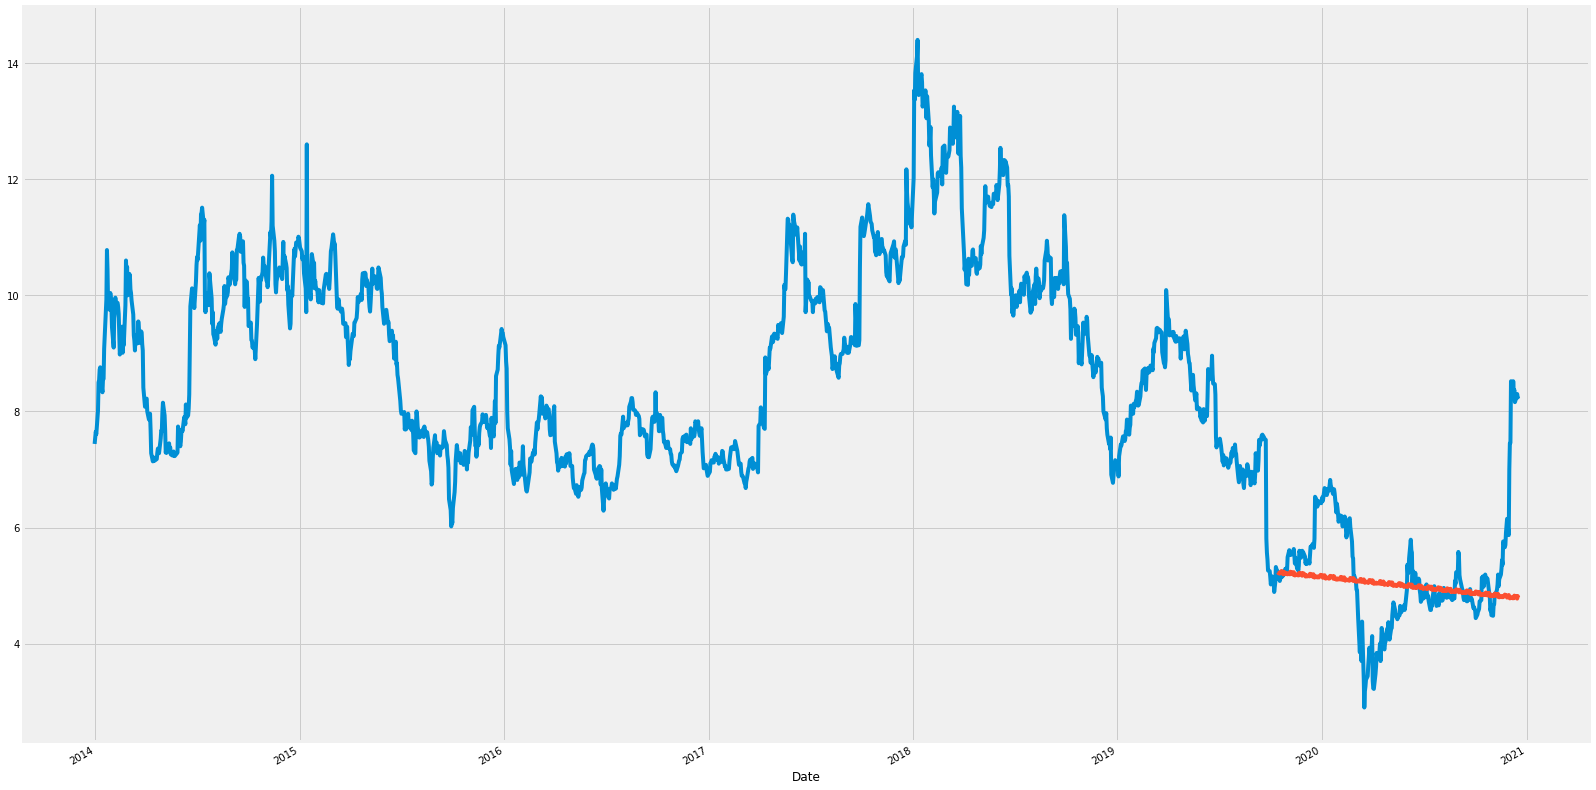

In [57]:
plt.figure(figsize=(25, 15))
df.plot()
predictions.plot()

In [59]:
from statsmodels.tsa.arima_model import ARIMA

In [60]:
arima_model=ARIMA(df,order=(1,1,1))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [61]:
res2 =arima_model.fit()

In [62]:
predictions=res2.predict(start='2019-10-15',end='2020-12-17',dynamic=True)


In [64]:
predictions.head()

Date
2019-10-15    0.009154
2019-10-16   -0.000927
2019-10-17    0.000680
2019-10-18    0.000424
2019-10-21    0.000465
dtype: float64

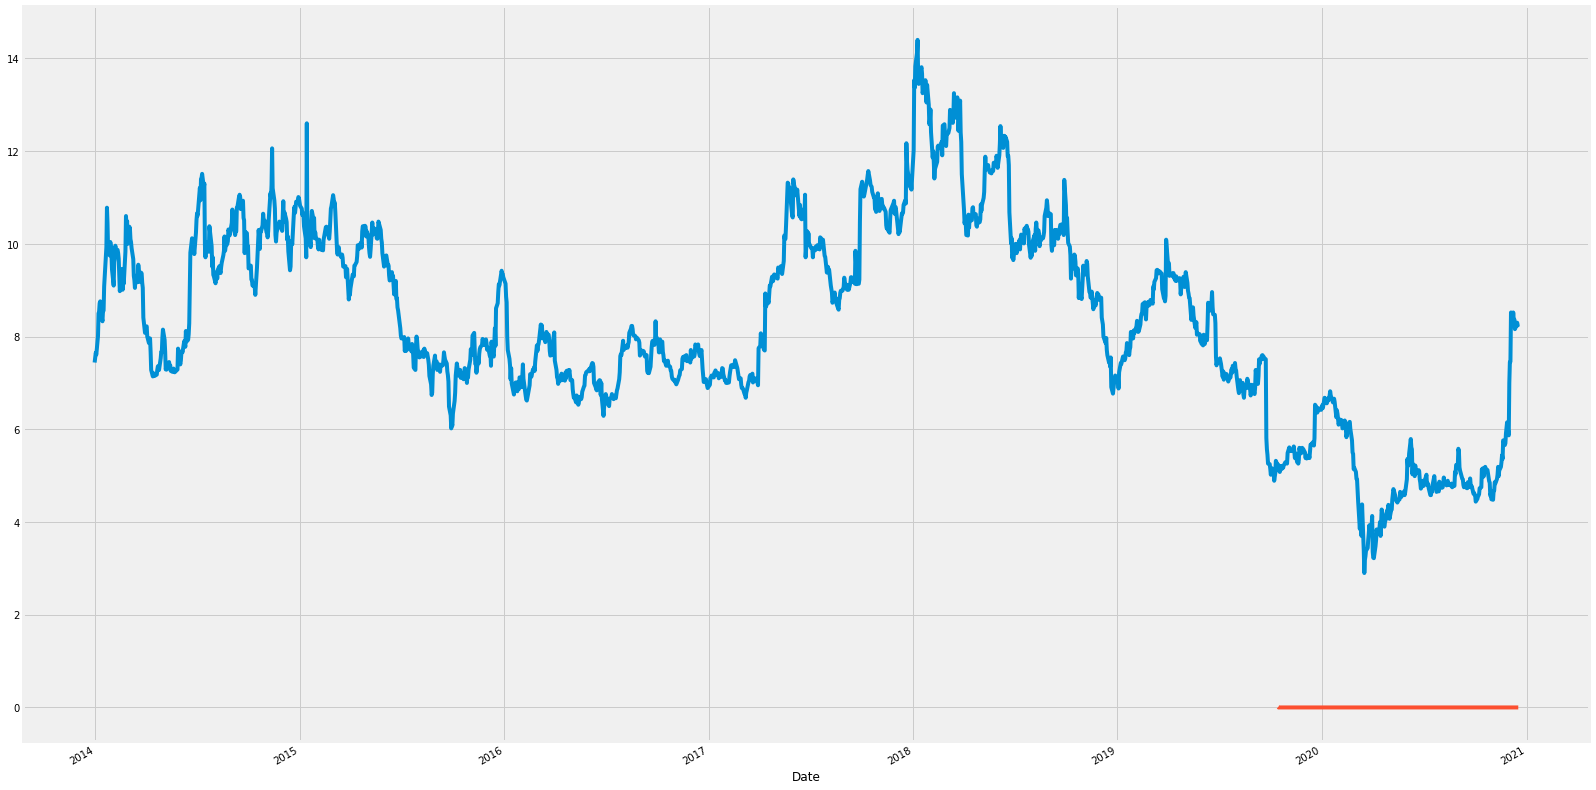

In [63]:
plt.figure(figsize=(25, 15))
df.plot()
predictions.plot()